Using Google Places API
---

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import json
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import api_key


Fetching hotels for Portugal...
Fetching hotels for United Kingdom...
Fetching hotels for United States...
Fetching hotels for Spain...
Fetching hotels for Ireland...
Fetching hotels for France...
Fetching hotels for Romania...
Fetching hotels for Norway...
Fetching hotels for Oman...
Fetching hotels for Argentina...
Fetching hotels for Poland...
Fetching hotels for Germany...
Fetching hotels for Belgium...
Fetching hotels for Switzerland...
Fetching hotels for China...
Fetching hotels for Greece...
Fetching hotels for Italy...
Fetching hotels for Netherlands...
Fetching hotels for Denmark...
Fetching hotels for Russia...
Fetching hotels for Sweden...
Fetching hotels for Australia...
Fetching hotels for Estonia...
Fetching hotels for Czech Republic...
Fetching hotels for Brazil...
Fetching hotels for Finland...
Fetching hotels for Mozambique...
Fetching hotels for Botswana...
Fetching hotels for Luxembourg...
Fetching hotels for Slovenia...
Fetching hotels for Albania...
Fetching hotel

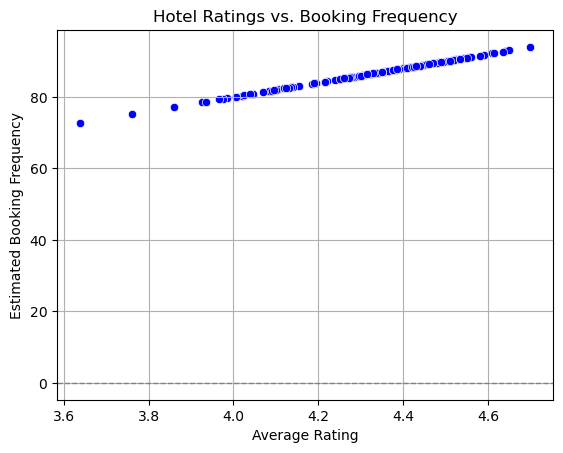

In [33]:
# Define the country mapping with representative locations
country_location_mapping = {
    'PRT': ("Portugal", "38.736946,-9.142685"),  # Lisbon
    'GBR': ("United Kingdom", "51.507351,-0.127758"),  # London
    'USA': ("United States", "40.712776,-74.005974"),  # New York City
    'ESP': ("Spain", "40.416775,-3.703790"),  # Madrid
    'IRL': ("Ireland", "53.349805,-6.26031"),  # Dublin
    'FRA': ("France", "48.856613,2.352222"),  # Paris
    'ROU': ("Romania", "44.426767,26.102538"),  # Bucharest
    'NOR': ("Norway", "59.913868,10.752245"),  # Oslo
    'OMN': ("Oman", "23.58589,58.405923"),  # Muscat
    'ARG': ("Argentina", "-34.603684,-58.381559"),  # Buenos Aires
    'POL': ("Poland", "52.229676,21.012229"),  # Warsaw
    'DEU': ("Germany", "52.520008,13.404954"),  # Berlin
    'BEL': ("Belgium", "50.850346,4.351721"),  # Brussels
    'CHE': ("Switzerland", "46.948097,7.447448"),  # Bern
    'CN': ("China", "39.904202,116.407394"),  # Beijing
    'GRC': ("Greece", "37.983810,23.727539"),  # Athens
    'ITA': ("Italy", "41.902782,12.496366"),  # Rome
    'NLD': ("Netherlands", "52.367573,4.904138"),  # Amsterdam
    'DNK': ("Denmark", "55.676098,12.568337"),  # Copenhagen
    'RUS': ("Russia", "55.755825,37.617298"),  # Moscow
    'SWE': ("Sweden", "59.329323,18.068581"),  # Stockholm
    'AUS': ("Australia", "-33.868820,151.209290"),  # Sydney
    'EST': ("Estonia", "59.437198,24.753575"),  # Tallinn
    'CZE': ("Czech Republic", "50.075538,14.437800"),  # Prague
    'BRA': ("Brazil", "-23.550520,-46.633308"),  # São Paulo
    'FIN': ("Finland", "60.169524,24.935445"),  # Helsinki
    'MOZ': ("Mozambique", "-25.966221,32.589202"),  # Maputo
    'BWA': ("Botswana", "-24.628200,25.923147"),  # Gaborone
    'LUX': ("Luxembourg", "49.611800,6.131959"),  # Luxembourg City
    'SVN': ("Slovenia", "46.051080,14.505127"),  # Ljubljana
    'ALB': ("Albania", "41.327500,19.818890"),  # Tirana
    'IND': ("India", "28.613939,77.209021"),  # New Delhi
    'MEX': ("Mexico", "19.432608,-99.133209"),  # Mexico City
    'MAR': ("Morocco", "33.971588,-6.849813"),  # Rabat
    'UKR': ("Ukraine", "50.450001,30.523333"),  # Kyiv
    'SMR': ("San Marino", "43.933333,12.466667"),  # San Marino City
    'LVA': ("Latvia", "56.949648,24.105186"),  # Riga
    'PRI': ("Puerto Rico", "18.220833,-66.590149"),  # San Juan
    'SRB': ("Serbia", "44.786568,20.448921"),  # Belgrade
    'CHL': ("Chile", "-33.448891,-70.669265"),  # Santiago
    'AUT': ("Austria", "48.208174,16.373819"),  # Vienna
    'BLR': ("Belarus", "53.904540,27.559024"),  # Minsk
    'LTU': ("Lithuania", "54.687157,25.279652"),  # Vilnius
    'TUR': ("Turkey", "39.933333,32.859222"),  # Ankara
    'ZAF': ("South Africa", "-25.747868,28.229271"),  # Pretoria
    'AGO': ("Angola", "-8.839988,13.234305"),  # Luanda
    'ISR': ("Israel", "31.046051,34.851612"),  # Jerusalem
    'CYM': ("Cayman Islands", "19.290300,-81.254600"),  # George Town
    'ZMB': ("Zambia", "-15.387525,28.322800"),  # Lusaka
    'CPV': ("Cape Verde", "16.002082,-24.013197"),  # Praia
    'ZWE': ("Zimbabwe", "-17.829222,31.052200"),  # Harare
    'DZA': ("Algeria", "36.753768,3.058756"),  # Algiers
    'KOR': ("South Korea", "35.907757,127.766922"),  # Seoul
    'CRI': ("Costa Rica", "9.928100,-84.090724"),  # San José
    'HUN': ("Hungary", "47.497912,19.040235"),  # Budapest
    'ARE': ("United Arab Emirates", "25.276987,55.296249"),  # Abu Dhabi
    'TUN': ("Tunisia", "33.886917,9.537499"),  # Tunis
    'JAM': ("Jamaica", "18.109581,-77.297508"),  # Kingston
    'HRV': ("Croatia", "45.1,15.2"),  # Zagreb
    'HKG': ("Hong Kong", "22.396428,114.109497"),  # Hong Kong
    'IRN': ("Iran", "35.689197,51.388974"),  # Tehran
    'GEO': ("Georgia", "41.715137,44.827099"),  # Tbilisi
    'AND': ("Andorra", "42.506317,1.521093"),  # Andorra la Vella
    'GIB': ("Gibraltar", "36.140751,-5.353585"),  # Gibraltar
    'URY': ("Uruguay", "-34.901113,-56.164532"),  # Montevideo
    'JEY': ("Jersey", "49.186000,-2.130000"),  # St. Helier
    'CAF': ("Central African Republic", "4.394674,18.558130"),  # Bangui
    'CYP': ("Cyprus", "35.126413,33.429859"),  # Nicosia
    'COL': ("Colombia", "4.611, -74.08175"),  # Bogotá
    'GGY': ("Guernsey", "49.465691,-2.585427"),  # St. Peter Port
    'KWT': ("Kuwait", "29.3759,47.9774"),  # Kuwait City
    'NGA': ("Nigeria", "9.0820,8.6753"),  # Abuja
    'MDV': ("Maldives", "3.2028,73.2207"),  # Malé
    'VEN': ("Venezuela", "10.4880,-66.8983"),  # Caracas
    'SVK': ("Slovakia", "48.1482,17.1067"),  # Bratislava
    'FJI': ("Fiji", "-17.7134,178.0650"),  # Suva
    'KAZ': ("Kazakhstan", "48.0196,66.9237"),  # Almaty
    'PAK': ("Pakistan", "30.3753,69.3451"),  # Islamabad
    'IDN': ("Indonesia", "-6.1751,106.8650"),  # Jakarta
    'LBN': ("Lebanon", "33.8548,35.8623"),  # Beirut
    'PHL': ("Philippines", "13.4125,122.5621"),  # Manila
    'SEN': ("Senegal", "14.6928,-14.0082"),  # Dakar
    'SYC': ("Seychelles", "-4.6796,55.4915"),  # Victoria
    'AZE': ("Azerbaijan", "40.4093,49.8671"),  # Baku
    'BHR': ("Bahrain", "26.0667,50.5577"),  # Manama
    'NZL': ("New Zealand", "-40.9006,174.886"),  # Wellington
    'THA': ("Thailand", "13.7563,100.5018"),  # Bangkok
    'DOM': ("Dominican Republic", "18.7357,-70.1627"),  # Santo Domingo
    'MKD': ("North Macedonia", "41.6086,21.7453"),  # Skopje
    'MYS': ("Malaysia", "4.2105,101.9758"),  # Kuala Lumpur
    'ARM': ("Armenia", "40.0691,45.0382"),  # Yerevan
    'JPN': ("Japan", "35.6762,139.6503"),  # Tokyo
    'LKA': ("Sri Lanka", "6.9271,79.9612"),  # Colombo
    'CUB': ("Cuba", "21.5216,-77.7812"),  # Havana
    'CMR': ("Cameroon", "3.8480,11.5021"),  # Yaoundé
    'BIH': ("Bosnia and Herzegovina", "43.8486,18.3564"),  # Sarajevo
    'MUS': ("Mauritius", "-20.348404,57.552152"),  # Port Louis
    'COM': ("Comoros", "-11.7020,43.2473"),  # Moroni
    'SUR': ("Suriname", "5.8681,-55.1726"),  # Paramaribo
    'UGA': ("Uganda", "1.3733,32.2903"),  # Kampala
    'BGR': ("Bulgaria", "42.6977,23.3219"),  # Sofia
    'CIV': ("Ivory Coast", "5.3453,-4.0244"),  # Yamoussoukro
    'JOR': ("Jordan", "30.5852,36.2384"),  # Amman
    'SYR': ("Syria", "33.5151,36.3004"),  # Damascus
    'SGP': ("Singapore", "1.3521,103.8198"),  # Singapore
    'BDI': ("Burundi", "-3.3731,29.9189"),  # Gitega
    'SAU': ("Saudi Arabia", "23.8859,45.0792"),  # Riyadh
    'VNM': ("Vietnam", "14.0583,108.2772"),  # Hanoi
    'PLW': ("Palau", "7.5149,134.5824"),  # Ngerulmud
    'QAT': ("Qatar", "25.276987,51.520008"),  # Doha
    'EGY': ("Egypt", "30.802498,28.78432"),  # Cairo
    'PER': ("Peru", "-9.1900,-75.0152"),  # Lima
    'MLT': ("Malta", "35.9375,14.3754"),  # Valletta
    'MWI': ("Malawi", "-13.2543,34.3015"),  # Lilongwe
    'ECU': ("Ecuador", "-1.8312,-78.1834"),  # Quito
    'MDG': ("Madagascar", "-18.7669,46.8691"),  # Antananarivo
    'ISL': ("Iceland", "64.1355,-21.8954"),  # Reykjavik
    'UZB': ("Uzbekistan", "41.3775,64.5854"),  # Tashkent
    'NPL': ("Nepal", "28.3949,84.1240"),  # Kathmandu
    'BHS': ("Bahamas", "25.0343,-77.3963"),  # Nassau
    'MAC': ("Macau", "22.1987,113.5439"),  # Macau
    'TGO': ("Togo", "8.6195,0.8248"),  # Lomé
    'TWN': ("Taiwan", "23.6978,120.9605"),  # Taipei
    'DJI': ("Djibouti", "11.8251,42.5903"),  # Djibouti
    'STP': ("Sao Tome and Principe", "0.1860,6.6084"),  # São Tomé
    'KNA': ("Saint Kitts and Nevis", "17.3039,-62.7825"),  # Basseterre
    'ETH': ("Ethiopia", "9.1450,40.489673"),  # Addis Ababa
    'IRQ': ("Iraq", "33.3152,44.3661"),  # Baghdad
    'HND': ("Honduras", "14.9010,-86.4415"),  # Tegucigalpa
    'RWA': ("Rwanda", "-1.9403,29.8739"),  # Kigali
    'KHM': ("Cambodia", "12.5657,104.9910"),  # Phnom Penh
    'MCO': ("Monaco", "43.7384,7.4246"),  # Monaco
    'BGD': ("Bangladesh", "23.685-90.3563"),  # Dhaka
    'IMN': ("Isle of Man", "54.2361,-4.5481"),  # Douglas
    'TJK': ("Tajikistan", "38.8610,71.2761"),  # Dushanbe
    'NIC': ("Nicaragua", "12.8654,-85.2072"),  # Managua
    'BEN': ("Benin", "9.5372,2.3158"),  # Porto-Novo
    'VGB': ("British Virgin Islands", "18.4207,-64.6399"),  # Road Town
    'TZA': ("Tanzania", "-6.3690,34.8888"),  # Dodoma
    'GAB': ("Gabon", "-0.8031,11.6094"),  # Libreville
    'GHA': ("Ghana", "7.1733,-0.2934"),  # Accra
    'TMP': ("Timor-Leste", "-8.8746,125.7275"),  # Dili
    'GLP': ("Guadeloupe", "16.9959,-62.0676"),  # Basse-Terre
    'KEN': ("Kenya", "-1.286389,36.817223"),  # Nairobi
    'LIE': ("Liechtenstein", "47.1415,9.5215"),  # Vaduz
    'GNB': ("Guinea-Bissau", "11.8037,-15.5809"),  # Bissau
    'MNE': ("Montenegro", "42.4411,19.2636"),  # Podgorica
    'UMI': ("United States Minor Outlying Islands", "17.5,-62.5"),  # Various
    'MYT': ("Mayotte", "-12.8275,45.1663"),  # Mamoudzou
    'FRO': ("Faroe Islands", "62.0184,-6.7660"),  # Tórshavn
    'MMR': ("Myanmar", "21.9139,95.9560"),  # Naypyidaw
    'PAN': ("Panama", "8.9824,-79.5199"),  # Panama City
    'BFA': ("Burkina Faso", "12.2383,-1.5616"),  # Ouagadougou
    'LBY': ("Libya", "26.3351,17.2283"),  # Tripoli
    'MLI': ("Mali", "17.5707,-3.9962"),  # Bamako
    'NAM': ("Namibia", "-22.9576,18.4904"),  # Windhoek
    'BOL': ("Bolivia", "-16.5000,-68.1193"),  # Sucre
    'PRY': ("Paraguay", "-23.4422,-58.4438"),  # Asunción
    'BRB': ("Barbados", "13.1939,-59.5432"),  # Bridgetown
    'ABW': ("Aruba", "12.5211,-70.0387"),  # Oranjestad
    'AIA': ("Anguilla", "18.2206,-63.0686"),  # The Valley
    'SLV': ("El Salvador", "13.7942,-88.8965"),  # San Salvador
    'DMA': ("Dominica", "15.4150,-61.3713"),  # Roseau
    'PYF': ("French Polynesia", "-17.6797,-149.4068"),  # Papeete
    'GUY': ("Guyana", "4.8604,-58.9302"),  # Georgetown
    'LCA': ("Saint Lucia", "13.9094,-60.9789"),  # Castries
    'ATA': ("Antarctica", "-90.0000,0.0000"),  # Various
    'GTM': ("Guatemala", "15.7835,-90.2308"),  # Guatemala City
    'ASM': ("American Samoa", "-14.3064,-170.6950"),  # Pago Pago
    'MRT': ("Mauritania", "18.0858,-15.9820"),  # Nouakchott
    'NCL': ("New Caledonia", "-22.2855,166.4415"),  # Nouméa
    'KIR': ("Kiribati", "-3.3704,-168.7345"),  # South Tarawa
    'SDN': ("Sudan", "15.5000,32.5599"),  # Khartoum
    'ATF': ("French Southern Territories", "-49.2800,69.3486"),  # Various
    'SLE': ("Sierra Leone", "8.4657,-13.2349"),  # Freetown
    'LAO': ("Laos", "19.8563,102.4955")  # Vientiane
}

# Initialize a list to hold results
results = []

# Fetching data from Google Places API for lodging (hotels)
for code, (country_name, location) in country_location_mapping.items():
    print(f"Fetching hotels for {country_name}...")
    
    # Define the URL for the Google Places API request
    url = f"https://maps.googleapis.com/maps/api/place/textsearch/json?query=hotels+in+{country_name}&key={api_key}"

    # Send the GET request
    response = requests.get(url)
    data = response.json()
    
    # Parse the results
    for place in data.get("results", []):
        rating = place.get("rating", np.nan)  # Use NaN for missing ratings
        
        # Append to the results list
        results.append({
            "Country Code": code,
            "Country Name": country_name,
            "Rating": rating
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Calculate average ratings for each country
average_ratings = results_df.groupby("Country Name")["Rating"].mean().reset_index()
average_ratings.columns = ["Country Name", "Average Rating"]

# Simulating booking frequency based on ratings
# Assuming higher ratings lead to higher booking frequencies
average_ratings['Booking Frequency'] = (average_ratings['Average Rating'] * 20).clip(lower=0)  # Scale and clip to 0

# Visualizing the relationship between ratings and bookings
sns.scatterplot(data=average_ratings, x='Average Rating', y='Booking Frequency',color='blue')
plt.title('Hotel Ratings vs. Booking Frequency')
plt.xlabel('Average Rating')
plt.ylabel('Estimated Booking Frequency')
plt.axhline(0, color='grey', lw=1, ls='--')  # Reference line for bookings
plt.grid()
plt.savefig("../Images/scatter_plot.png")
plt.show()


In [54]:
hotel_booking_df=pd.read_csv("../Resources/hotel_bookings_dataset.csv")
hotel_api_df=pd.read_csv("../Resources/hotel_ratings_bookings_APIdataset.csv")

hotel_booking_df['Country Name'] = hotel_booking_df['country'].map(lambda code: country_location_mapping.get(code, (None,))[0])
# print(hotel_booking_df['Country Name'])
merged_df=pd.merge(hotel_api_df,hotel_booking_df,how="left",on="Country Name")

merged_df.head()


,Country Name,Average Rating,Booking Frequency,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Albania,4.42,88.4,Resort Hotel,0,28,2015,July,30,24,...,No Deposit,177.0,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-28
1,Albania,4.42,88.4,Resort Hotel,1,32,2016,June,24,5,...,No Deposit,240.0,NaN,0,Transient,113.00,0,0,Canceled,2016-05-19
2,Albania,4.42,88.4,Resort Hotel,0,40,2016,March,12,13,...,No Deposit,156.0,NaN,0,Transient,35.15,0,2,Check-Out,2016-03-16
3,Albania,4.42,88.4,City Hotel,0,3,2015,December,51,18,...,No Deposit,14.0,NaN,0,Transient,65.89,0,0,Check-Out,2015-12-20
4,Albania,4.42,88.4,City Hotel,1,13,2016,April,18,25,...,No Deposit,9.0,NaN,0,Transient,109.00,0,0,Canceled,2016-04-18


In [55]:
print(merged_df.isnull().sum())

Country Name                           0
Average Rating                         0
Booking Frequency                      0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [59]:
merged_df.columns

Index(['Country Name', 'Average Rating', 'Booking Frequency', 'hotel',
       'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Fill missing values (if needed)
merged_df.fillna({'Average Rating': merged_df['Average Rating'].mean(), 'Booking Frequency': 0}, inplace=True)

In [84]:
# Convert 'arrival_date_year' and 'arrival_date_month' to categorical data
merged_df['arrival_date_year'] = merged_df['arrival_date_year'].astype('category')
merged_df['arrival_date_month'] = merged_df['arrival_date_month'].astype('category').cat.codes

# Convert 'is_canceled' to boolean
merged_df['is_canceled'] = merged_df['is_canceled'].astype(bool)

In [70]:
merged_df = merged_df[merged_df['Booking Frequency'] >= 0]

In [75]:
# Summary statistics
merged_df.describe()

# Check the correlation between 'Average Rating' and 'Booking Frequency'
correlation = merged_df[['Average Rating', 'Booking Frequency']].corr()
print(correlation)

                   Average Rating  Booking Frequency
Average Rating                1.0                1.0
Booking Frequency             1.0                1.0


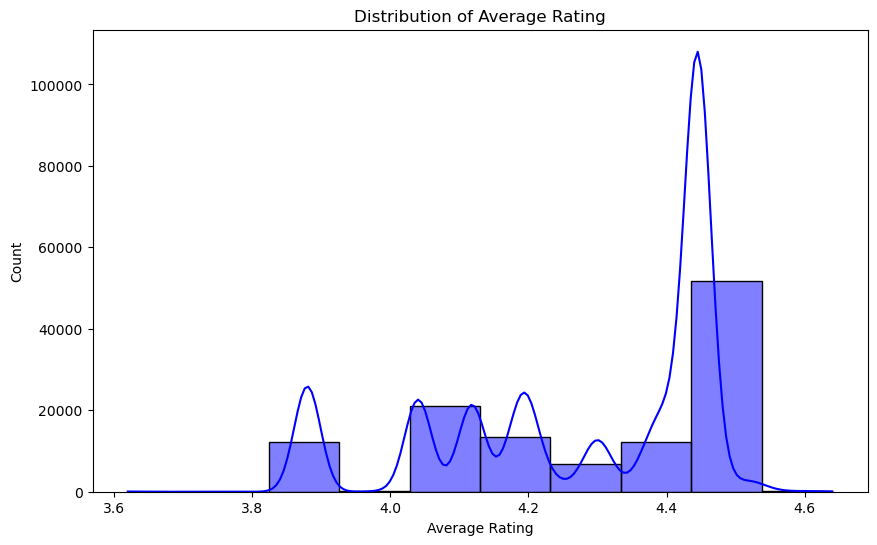

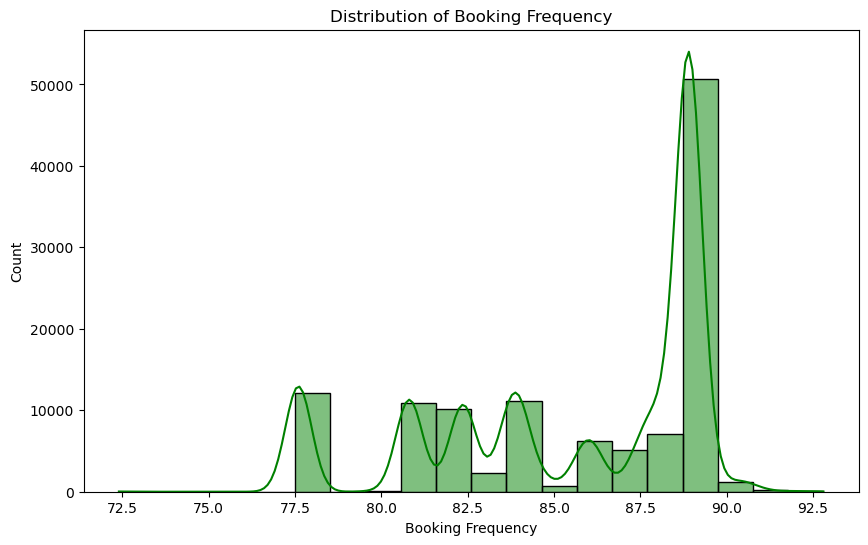

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Average Rating'], kde=True, bins=10, color='blue')
plt.title('Distribution of Average Rating')
plt.show()

# Distribution of Booking Frequency
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Booking Frequency'], kde=True, bins=20, color='green')
plt.title('Distribution of Booking Frequency')
plt.show()

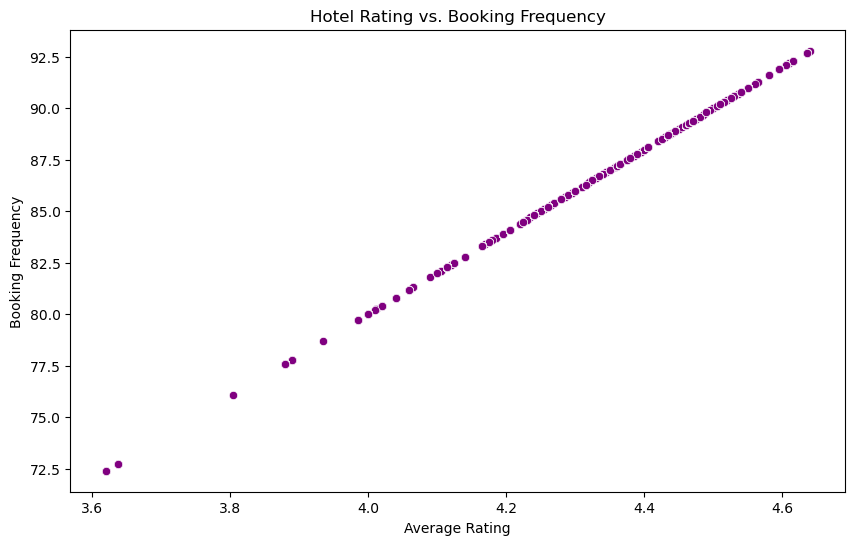

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Average Rating', y='Booking Frequency', data=merged_df, color='purple')
plt.title('Hotel Rating vs. Booking Frequency')
plt.xlabel('Average Rating')
plt.ylabel('Booking Frequency')
plt.show()

In [78]:
correlation = merged_df[['Average Rating', 'Booking Frequency']].corr(method='pearson')
print(f'Pearson correlation: {correlation.loc["Average Rating", "Booking Frequency"]}')

Pearson correlation: 0.9999999999999984


In [79]:
# Create rating categories
merged_df['Rating Category'] = pd.cut(merged_df['Average Rating'], bins=[0, 2, 3, 4, 5], labels=['Low', 'Medium', 'Good', 'Excellent'])

# Calculate the average booking frequency for each rating category
rating_group = merged_df.groupby('Rating Category')['Booking Frequency'].mean()
print(rating_group)

Rating Category
Low                NaN
Medium             NaN
Good         77.603616
Excellent    86.519571
Name: Booking Frequency, dtype: float64


C:\Users\Hetumehulpra\AppData\Local\Temp\ipykernel_4088\3301661121.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_group = merged_df.groupby('Rating Category')['Booking Frequency'].mean()


C:\Users\Hetumehulpra\AppData\Local\Temp\ipykernel_4088\618059651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating Category', y='Booking Frequency', data=merged_df, palette='coolwarm')


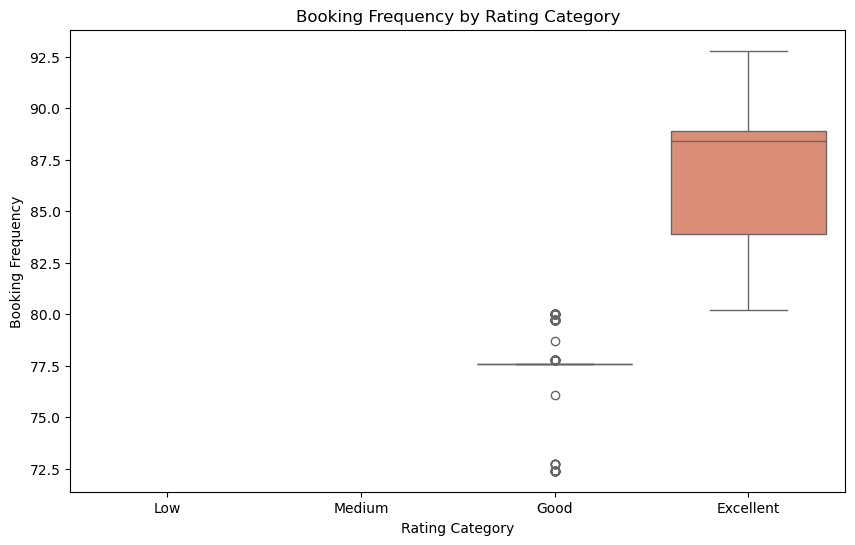

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating Category', y='Booking Frequency', data=merged_df, palette='coolwarm')
plt.title('Booking Frequency by Rating Category')
plt.show()

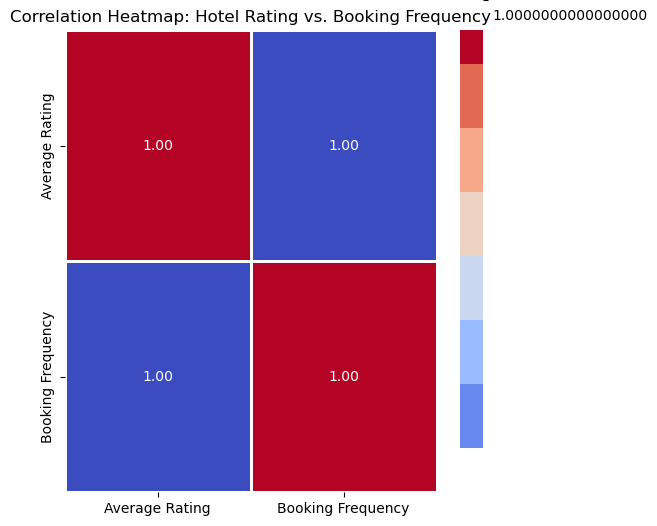

In [87]:
# Select only the relevant columns: 'Average Rating' and 'Booking Frequency'
correlation_df = merged_df[['Average Rating', 'Booking Frequency']]

# Generate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap: Hotel Rating vs. Booking Frequency')
plt.show()

In [92]:
# Group by 'Country Name' and calculate the sum or mean of 'Booking Frequency' for each country
top_10_countries = merged_df.groupby('Country Name')['Booking Frequency'].sum().sort_values(ascending=False).head(10)

# Display the top 10 countries
print(top_10_countries)

Country Name
Portugal          4319651.0
United Kingdom     941210.4
France             841532.0
Spain              718855.2
Germany            600448.8
Italy              323499.4
Ireland            297000.0
Belgium            201880.4
Brazil             185704.0
Netherlands        184100.0
Name: Booking Frequency, dtype: float64


In [93]:
# Filter the merged DataFrame to keep only the rows with the top 10 countries
top_10_df = merged_df[merged_df['Country Name'].isin(top_10_countries.index)]

# Display the first few rows of the filtered DataFrame
print(top_10_df.head())

     Country Name  Average Rating  Booking Frequency  is_canceled  lead_time  \
2466      Belgium            4.31               86.2        False        109   
2467      Belgium            4.31               86.2        False         34   
2468      Belgium            4.31               86.2        False         34   
2469      Belgium            4.31               86.2        False         80   
2470      Belgium            4.31               86.2        False         83   

      arrival_date_year  arrival_date_month  arrival_date_week_number  \
2466                  0                   5                        27   
2467                  0                   5                        29   
2468                  0                   5                        29   
2469                  0                   5                        31   
2470                  0                   1                        36   

      arrival_date_day_of_month  stays_in_weekend_nights  ...  agent  company  \

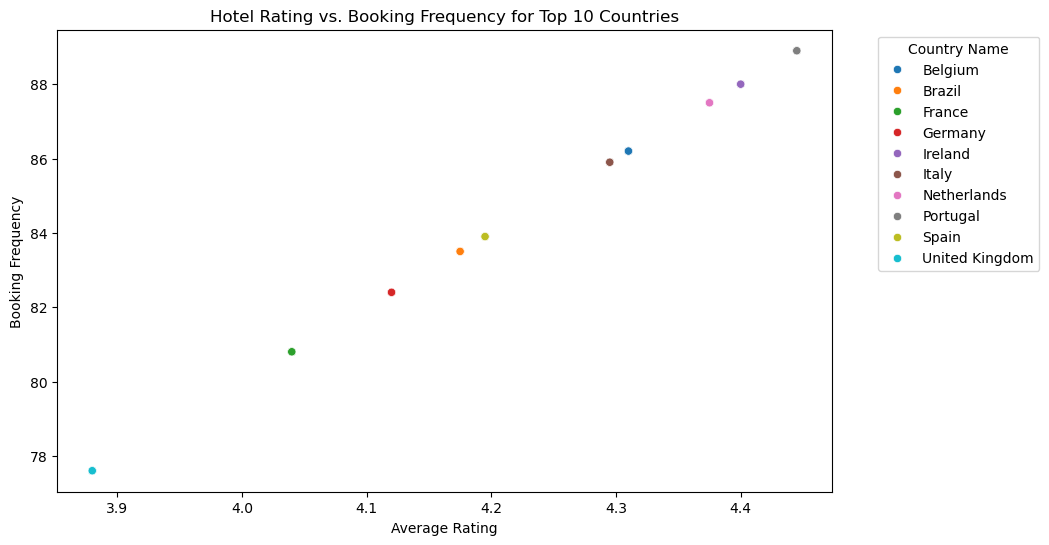

In [97]:
# Scatter plot to show the relationship between hotel rating and booking frequency for top 10 countries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Rating', y='Booking Frequency', hue='Country Name', data=top_10_df, palette='tab10')
plt.title('Hotel Rating vs. Booking Frequency for Top 10 Countries')
plt.xlabel('Average Rating')
plt.ylabel('Booking Frequency')
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

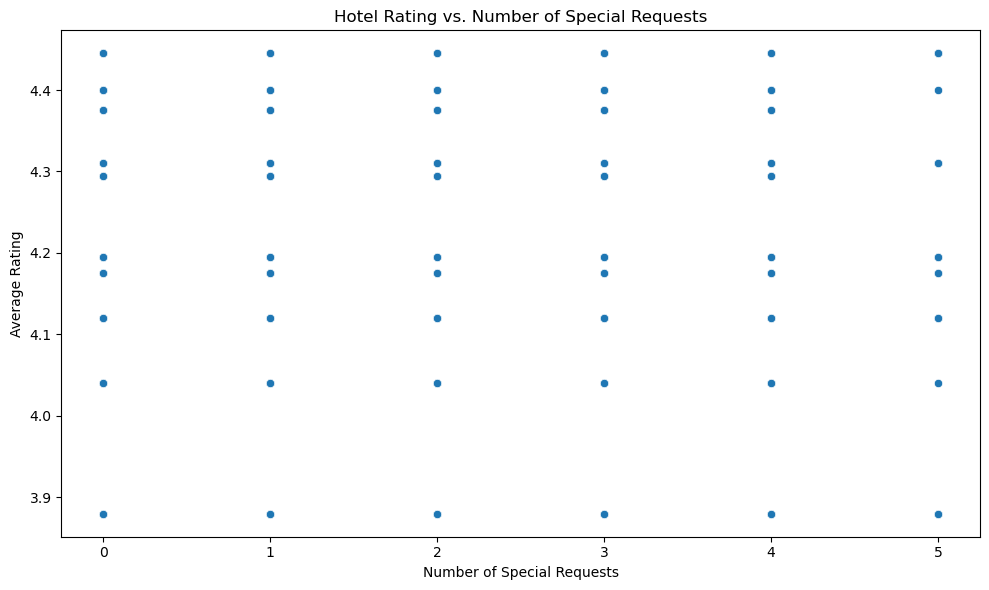

In [107]:
 # Hotel Rating vs. Number of Special Requests
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_of_special_requests', y='Average Rating', data=top_10_df)
plt.title('Hotel Rating vs. Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()